In [1]:
import pandas as pd
import numpy as np
import os
%load_ext autoreload
%autoreload 2
from src.model.one_class import DeepSVDD
from src.model.reconstruction import DAGMM, MemAutoEncoder
from src.trainer.ids import DeepSVDDIDSTrainer, MemAEIDSTrainer, DAGMMIDSTrainer
from src.utils import metrics
from src.utils.utils import ids_misclf_per_label
from src.datamanager.dataset import IDS2017Dataset
from src.bootstrap import store_results
from pathlib import Path

In [2]:
# Setup base folder structure
dataset_path = "../../data/IDS2017/ids2017.csv"

# General arguments
batch_size = 1024
device = "cuda"
act_fn = "relu"
n_layers = 4
compression_factor = 2
lr = 1e-4
n_epochs = 200
n_runs = 20

models_params = {
    "deepsvdd": {
        "model_cls": DeepSVDD,
        "trainer_cls": DeepSVDDIDSTrainer,
        "compression_factor": 2,
        "n_layers": 4,
        "act_fn": "relu",
        "keep_ckpt": False,
    },
    "dagmm": {
        "model_cls": DAGMM,
        "trainer_cls": DAGMMIDSTrainer,
        "n_mixtures": 4,
        "latent_dim": 1,
        "lambda_1": 0.005,
        "lambda_2": 0.1,
        "reg_covar": 1e-6,
        "compression_factor": 2,
        "act_fn": "relu",
        "n_layers": 4,
        "keep_ckpt": False,
    },
    "memae": {
        "model_cls": MemAutoEncoder,
        "trainer_cls": MemAEIDSTrainer,
        "mem_dim": 50,
        "latent_dim": 1,
        "shrink_thres": 0.0025,
        "n_layers": 4,
        "compression_factor": 2,
        "act_fn": "relu",
        "alpha": 2e-4,
        "keep_ckpt": False,
    }
}

print("arguments set")

arguments set


In [3]:
# Load data
dataset = IDS2017Dataset(path=dataset_path)
# Store label-wise performance
performance_hist = {model_name: {attack_label: [] for attack_label in dataset.labels} for model_name in models_params.keys()}

Training model deepsvdd for 20 runs of 200 epochs each
Initializing center c...
Center c initialized.
Epoch=0	Loss=1.1649
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=11	Precision=0.7194	Recall=0.6993	Best F1-Score=0.7092


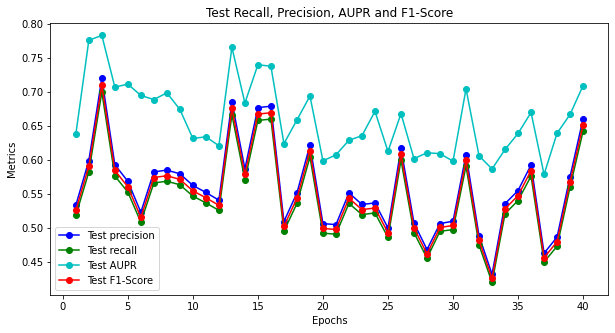

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.4519
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=6	Precision=0.7139	Recall=0.6950	Best F1-Score=0.7043


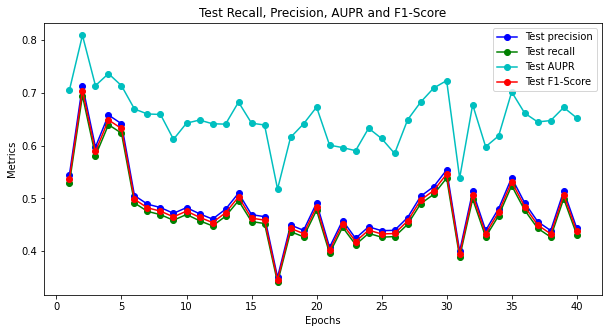

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.0816
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=1	Precision=0.7211	Recall=0.7072	Best F1-Score=0.7141


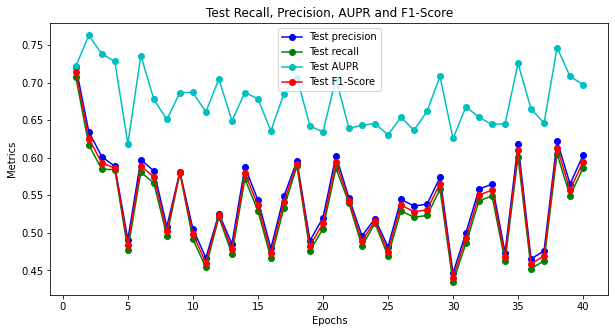

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.8974
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=1	Precision=0.7899	Recall=0.7680	Best F1-Score=0.7788


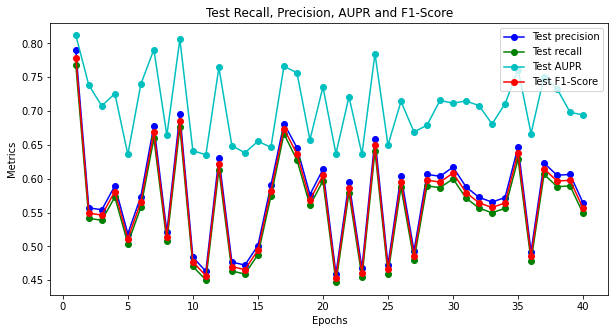

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.0045
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=31	Precision=0.6717	Recall=0.6554	Best F1-Score=0.6634


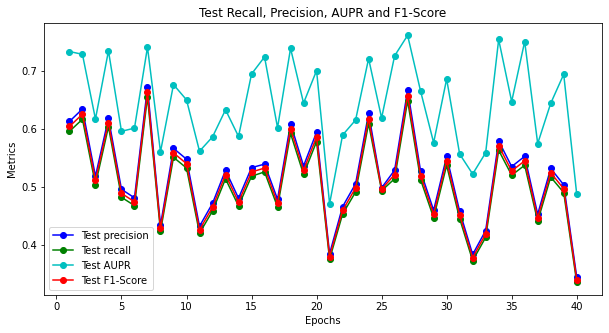

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.0009
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=26	Precision=0.6784	Recall=0.6595	Best F1-Score=0.6688


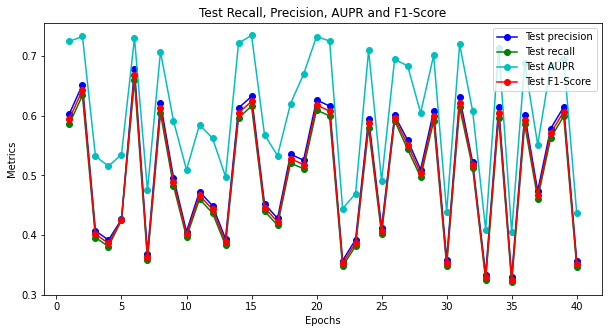

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.0036
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=81	Precision=0.7304	Recall=0.7101	Best F1-Score=0.7201


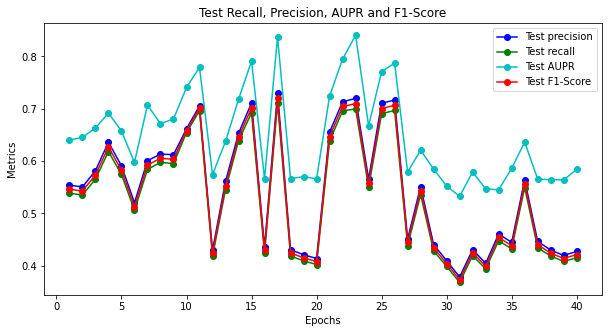

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.0045
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=91	Precision=0.6863	Recall=0.6687	Best F1-Score=0.6774


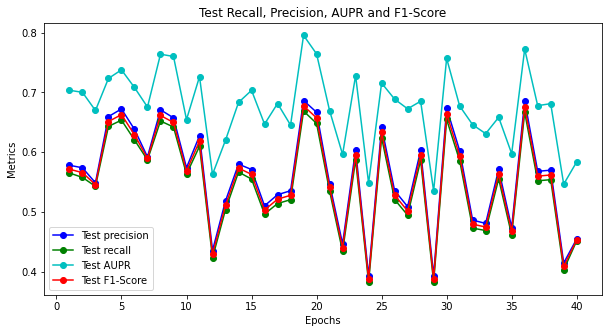

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.0274
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=86	Precision=0.6319	Recall=0.6143	Best F1-Score=0.6230


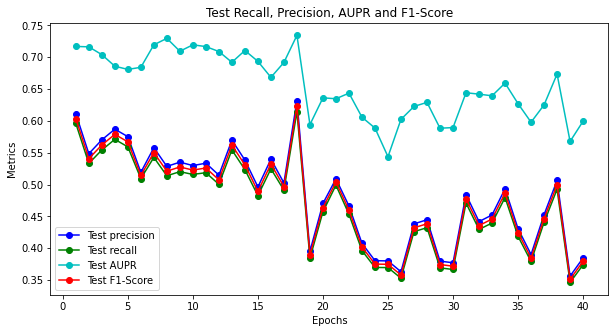

Initializing center c...
Center c initialized.
Epoch=0	Loss=1.1840
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=61	Precision=0.7124	Recall=0.6931	Best F1-Score=0.7027


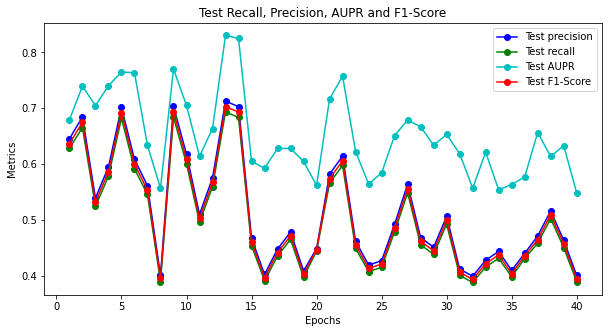

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.0639
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=1	Precision=0.7105	Recall=0.6907	Best F1-Score=0.7004


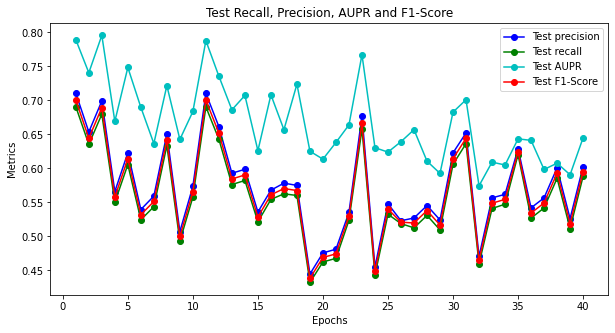

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.7318
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=141	Precision=0.7184	Recall=0.6986	Best F1-Score=0.7083


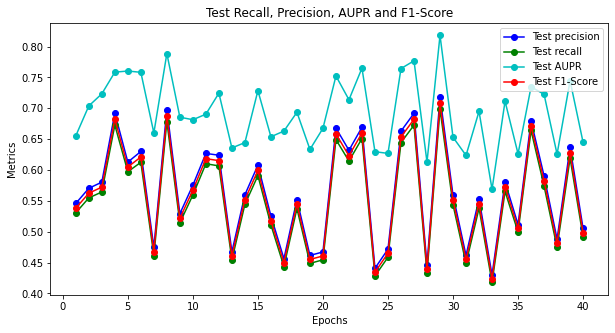

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.0815
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=1	Precision=0.7263	Recall=0.7060	Best F1-Score=0.7160


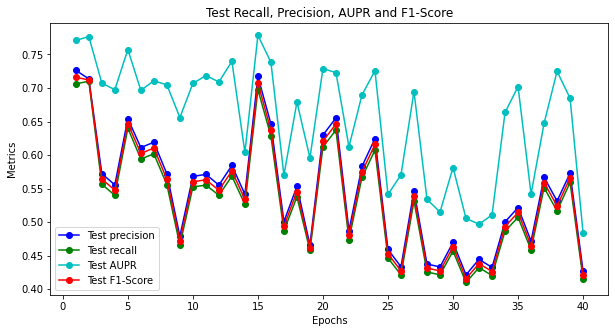

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.0347
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=41	Precision=0.7756	Recall=0.7540	Best F1-Score=0.7646


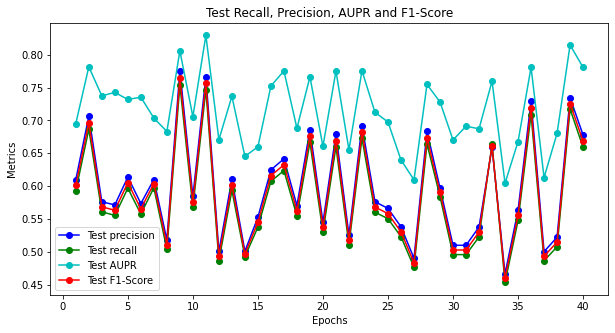

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.1356
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=26	Precision=0.6980	Recall=0.6789	Best F1-Score=0.6883


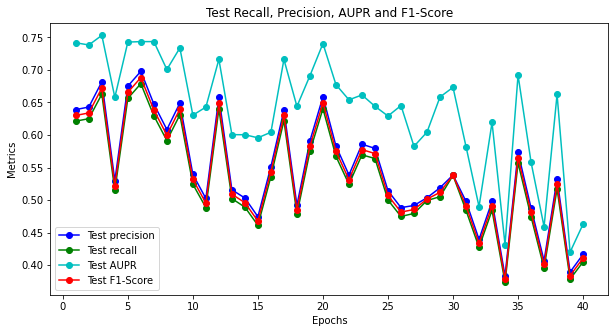

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.0202
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=86	Precision=0.7424	Recall=0.7217	Best F1-Score=0.7319


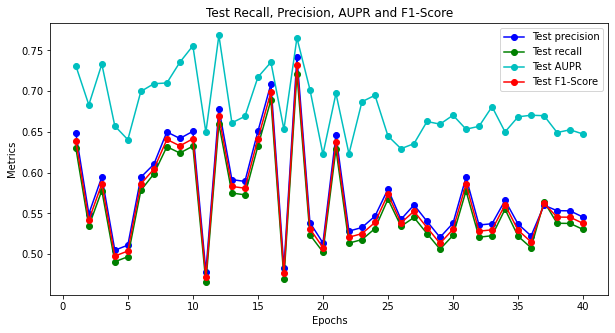

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.0055
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=6	Precision=0.6921	Recall=0.6728	Best F1-Score=0.6824


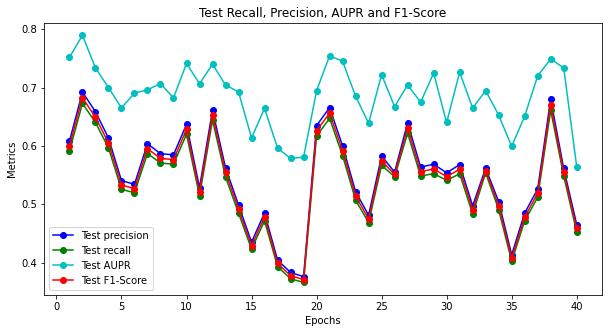

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.0825
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=71	Precision=0.8061	Recall=0.7836	Best F1-Score=0.7946


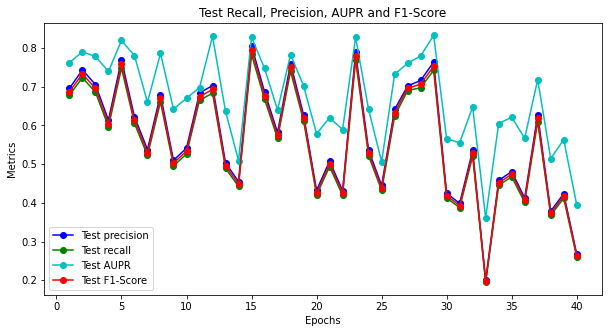

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.0617
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=36	Precision=0.7052	Recall=0.6863	Best F1-Score=0.6956


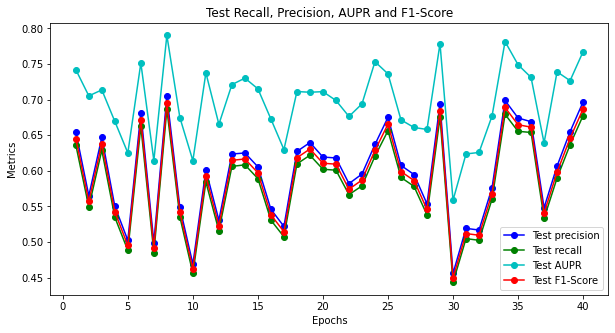

Initializing center c...
Center c initialized.
Epoch=0	Loss=0.0021
Epoch=10	Loss=0.0000
Epoch=20	Loss=0.0000
Epoch=30	Loss=0.0000
Epoch=40	Loss=0.0000
Epoch=50	Loss=0.0000
Epoch=60	Loss=0.0000
Epoch=70	Loss=0.0000
Epoch=80	Loss=0.0000
Epoch=90	Loss=0.0000
Epoch=100	Loss=0.0000
Epoch=110	Loss=0.0000
Epoch=120	Loss=0.0000
Epoch=130	Loss=0.0000
Epoch=140	Loss=0.0000
Epoch=150	Loss=0.0000
Epoch=160	Loss=0.0000
Epoch=170	Loss=0.0000
Epoch=180	Loss=0.0000
Epoch=190	Loss=0.0000
Best epoch=16	Precision=0.7102	Recall=0.6904	Best F1-Score=0.7002


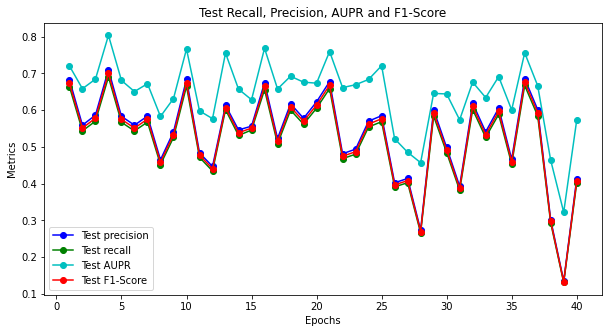

Training model dagmm for 20 runs of 200 epochs each
Epoch=0	Loss=2314124.8221
Epoch=10	Loss=885.3406
Epoch=20	Loss=613.4336
Epoch=30	Loss=581.5375
Epoch=40	Loss=571.4763
Epoch=50	Loss=567.5698
Epoch=60	Loss=564.4864
Epoch=70	Loss=563.1276
Epoch=80	Loss=562.5571
Epoch=90	Loss=561.4852
Epoch=100	Loss=561.1150
Epoch=110	Loss=561.0170
Epoch=120	Loss=561.6365
Epoch=130	Loss=560.7767
Epoch=140	Loss=559.6055
Epoch=150	Loss=559.6463
Epoch=160	Loss=559.1660
Epoch=170	Loss=559.3764
Epoch=180	Loss=556.6236
Epoch=190	Loss=553.1480
Best epoch=11	Precision=0.6689	Recall=0.6502	Best F1-Score=0.6594


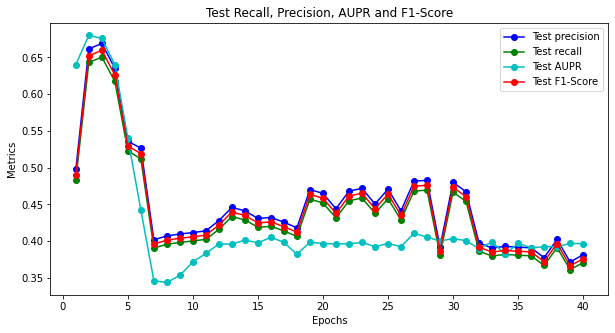

Epoch=0	Loss=2688711.7539
Epoch=10	Loss=780.4978
Epoch=20	Loss=571.5042
Epoch=30	Loss=553.1167
Epoch=40	Loss=544.0557
Epoch=50	Loss=538.2182
Epoch=60	Loss=534.1957
Epoch=70	Loss=530.0118
Epoch=80	Loss=526.0669
Epoch=90	Loss=524.2164
Epoch=100	Loss=523.6426
Epoch=110	Loss=522.5695
Epoch=120	Loss=521.7751
Epoch=130	Loss=520.8109
Epoch=140	Loss=520.6122
Epoch=150	Loss=520.3208
Epoch=160	Loss=519.8878
Epoch=170	Loss=519.1130
Epoch=180	Loss=518.7378
Epoch=190	Loss=518.6653
Best epoch=1	Precision=0.4002	Recall=0.3890	Best F1-Score=0.3945


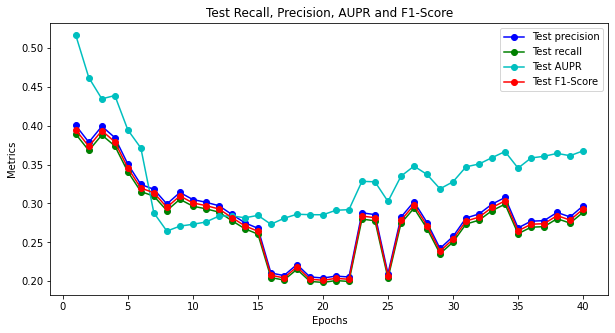

Epoch=0	Loss=6082122.7311
Epoch=10	Loss=912.5927
Epoch=20	Loss=605.5309
Epoch=30	Loss=569.5434
Epoch=40	Loss=558.0847
Epoch=50	Loss=553.6312
Epoch=60	Loss=551.7090
Epoch=70	Loss=549.6108
Epoch=80	Loss=548.4786
Epoch=90	Loss=546.0628
Epoch=100	Loss=544.4125
Epoch=110	Loss=543.4208
Epoch=120	Loss=543.2806
Epoch=130	Loss=542.6871
Epoch=140	Loss=542.5106
Epoch=150	Loss=542.2169
Epoch=160	Loss=541.9923
Epoch=170	Loss=541.6241
Epoch=180	Loss=541.8811
Epoch=190	Loss=541.1119
Best epoch=11	Precision=0.6176	Recall=0.6004	Best F1-Score=0.6089


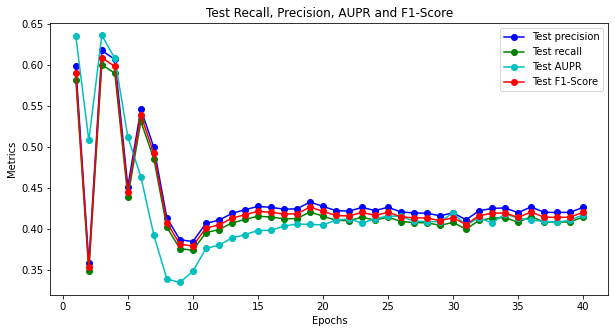

Epoch=0	Loss=1821102.9295
Epoch=10	Loss=1326.7545
Epoch=20	Loss=624.5690
Epoch=30	Loss=582.9316
Epoch=40	Loss=577.6844
Epoch=50	Loss=575.5035
Epoch=60	Loss=573.5276
Epoch=70	Loss=570.9183
Epoch=80	Loss=569.5006
Epoch=90	Loss=567.3053
Epoch=100	Loss=565.5286
Epoch=110	Loss=564.9641
Epoch=120	Loss=564.4621
Epoch=130	Loss=563.6521
Epoch=140	Loss=562.6597
Epoch=150	Loss=562.4039
Epoch=160	Loss=561.7739
Epoch=170	Loss=561.4789
Epoch=180	Loss=561.9367
Epoch=190	Loss=561.0772
Best epoch=186	Precision=0.6558	Recall=0.6375	Best F1-Score=0.6465


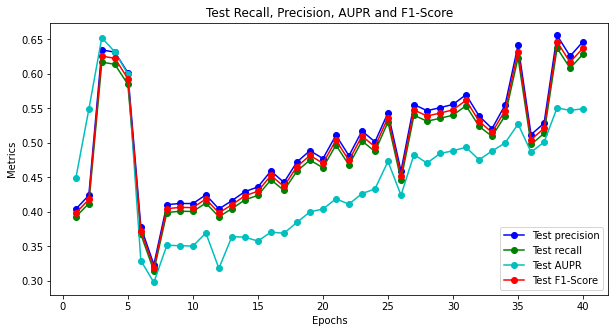

Epoch=0	Loss=1179804.9788
Epoch=10	Loss=786.2264
Epoch=20	Loss=570.9524
Epoch=30	Loss=555.3203
Epoch=40	Loss=547.5225
Epoch=50	Loss=545.3079
Epoch=60	Loss=543.6012
Epoch=70	Loss=542.7803
Epoch=80	Loss=541.5138
Epoch=90	Loss=540.9021
Epoch=100	Loss=539.4241
Epoch=110	Loss=538.0908
Epoch=120	Loss=537.6105
Epoch=130	Loss=537.3652
Epoch=140	Loss=536.9362
Epoch=150	Loss=536.7680
Epoch=160	Loss=536.4354
Epoch=170	Loss=536.7188
Epoch=180	Loss=536.2359
Epoch=190	Loss=536.2483
Best epoch=11	Precision=0.4385	Recall=0.4373	Best F1-Score=0.4379


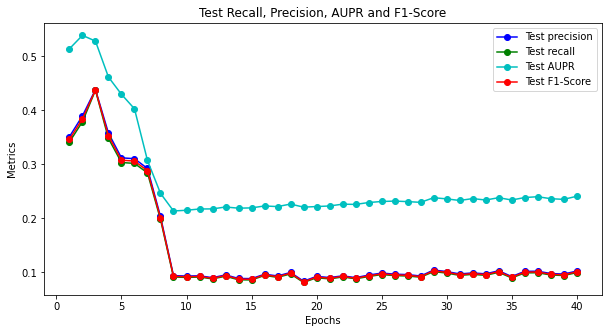

Epoch=0	Loss=3819180.0038
Epoch=10	Loss=817.0017
Epoch=20	Loss=579.2189
Epoch=30	Loss=549.1841
Epoch=40	Loss=537.7709
Epoch=50	Loss=532.8337
Epoch=60	Loss=530.9825
Epoch=70	Loss=529.9646
Epoch=80	Loss=528.6125
Epoch=90	Loss=528.2455
Epoch=100	Loss=528.1939
Epoch=110	Loss=527.1644
Epoch=120	Loss=527.3251
Epoch=130	Loss=526.3985
Epoch=140	Loss=526.5174
Epoch=150	Loss=526.4439
Epoch=160	Loss=525.8031
Epoch=170	Loss=525.7580
Epoch=180	Loss=525.5390
Epoch=190	Loss=524.9990
Best epoch=156	Precision=0.5301	Recall=0.5153	Best F1-Score=0.5226


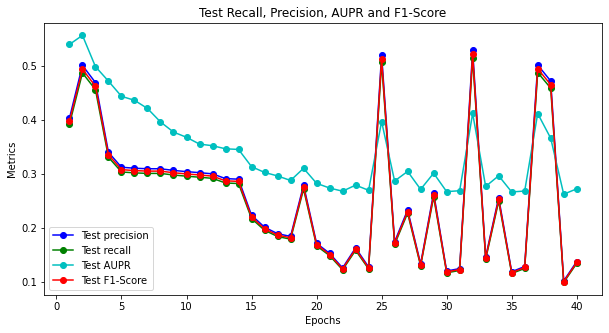

Epoch=0	Loss=807641.8110
Epoch=10	Loss=716.7756
Epoch=20	Loss=583.6941
Epoch=30	Loss=568.0182
Epoch=40	Loss=559.0310
Epoch=50	Loss=554.8001
Epoch=60	Loss=553.0182
Epoch=70	Loss=551.7224
Epoch=80	Loss=551.0600
Epoch=90	Loss=549.7510
Epoch=100	Loss=549.3276
Epoch=110	Loss=550.3883
Epoch=120	Loss=549.6617
Epoch=130	Loss=548.7596
Epoch=140	Loss=548.2136
Epoch=150	Loss=548.5539
Epoch=160	Loss=548.7025
Epoch=170	Loss=547.6284
Epoch=180	Loss=548.3887
Epoch=190	Loss=548.0426
Best epoch=6	Precision=0.6568	Recall=0.6384	Best F1-Score=0.6475


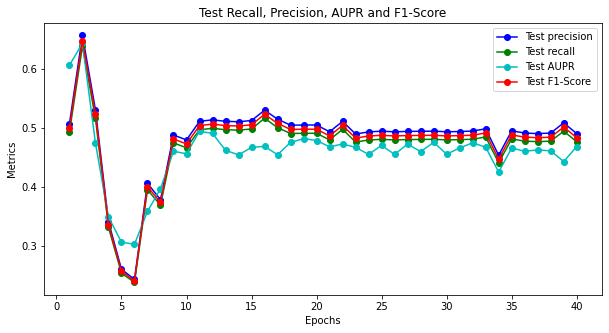

Epoch=0	Loss=2580576.6226
Epoch=10	Loss=1344.7886
Epoch=20	Loss=566.4757
Epoch=30	Loss=551.5739
Epoch=40	Loss=544.5450
Epoch=50	Loss=541.5626
Epoch=60	Loss=538.8491
Epoch=70	Loss=534.4032
Epoch=80	Loss=530.4929
Epoch=90	Loss=529.3250
Epoch=100	Loss=527.4910
Epoch=110	Loss=526.6284
Epoch=120	Loss=526.5325
Epoch=130	Loss=525.7538
Epoch=140	Loss=525.5693
Epoch=150	Loss=525.3017
Epoch=160	Loss=524.6722
Epoch=170	Loss=524.6383
Epoch=180	Loss=523.8320
Epoch=190	Loss=523.5787
Best epoch=16	Precision=0.3458	Recall=0.3361	Best F1-Score=0.3409


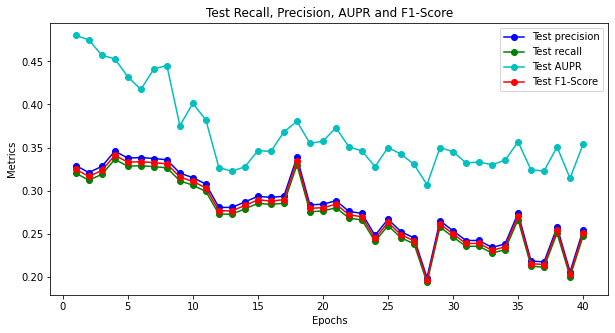

Epoch=0	Loss=3089200.1913
Epoch=10	Loss=2295.8804
Epoch=20	Loss=606.5268
Epoch=30	Loss=570.5908
Epoch=40	Loss=562.7018
Epoch=50	Loss=559.4349
Epoch=60	Loss=556.7932
Epoch=70	Loss=555.0191
Epoch=80	Loss=550.8138
Epoch=90	Loss=537.6820
Epoch=100	Loss=536.2295
Epoch=110	Loss=534.6343
Epoch=120	Loss=533.0415
Epoch=130	Loss=532.0670
Epoch=140	Loss=531.2009
Epoch=150	Loss=530.1830
Epoch=160	Loss=529.9900
Epoch=170	Loss=529.7516
Epoch=180	Loss=529.0853
Epoch=190	Loss=529.0235
Best epoch=11	Precision=0.6567	Recall=0.6397	Best F1-Score=0.6481


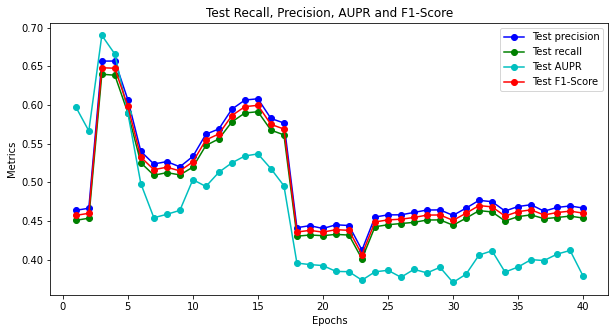

Epoch=0	Loss=2013306.3010
Epoch=10	Loss=982.4436
Epoch=20	Loss=595.7598
Epoch=30	Loss=567.4639
Epoch=40	Loss=562.2460
Epoch=50	Loss=557.7465
Epoch=60	Loss=556.3608
Epoch=70	Loss=549.7256
Epoch=80	Loss=549.7755
Epoch=90	Loss=548.3434
Epoch=100	Loss=547.9788
Epoch=110	Loss=547.3543
Epoch=120	Loss=548.9087
Epoch=130	Loss=546.6463
Epoch=140	Loss=545.7902
Epoch=150	Loss=544.3913
Epoch=160	Loss=543.9844
Epoch=170	Loss=542.1181
Epoch=180	Loss=541.6148
Epoch=190	Loss=540.6694
Best epoch=11	Precision=0.6769	Recall=0.6580	Best F1-Score=0.6673


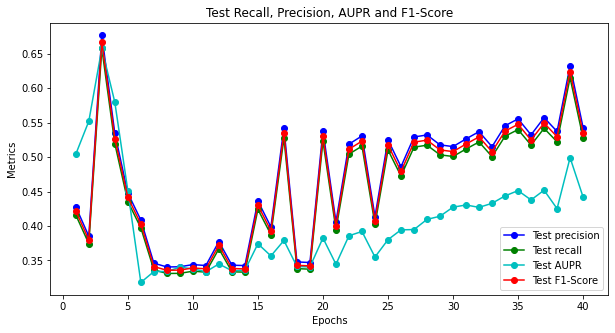

Epoch=0	Loss=2926200.4024
Epoch=10	Loss=1136.5358
Epoch=20	Loss=581.1120
Epoch=30	Loss=557.6591
Epoch=40	Loss=547.0676
Epoch=50	Loss=539.5678
Epoch=60	Loss=535.7607
Epoch=70	Loss=532.7645
Epoch=80	Loss=530.5650
Epoch=90	Loss=528.7549
Epoch=100	Loss=527.8662
Epoch=110	Loss=527.2304
Epoch=120	Loss=526.1900
Epoch=130	Loss=524.3311
Epoch=140	Loss=523.2136
Epoch=150	Loss=522.9852
Epoch=160	Loss=522.6482
Epoch=170	Loss=522.3646
Epoch=180	Loss=521.9463
Epoch=190	Loss=521.7692
Best epoch=1	Precision=0.4554	Recall=0.4428	Best F1-Score=0.4490


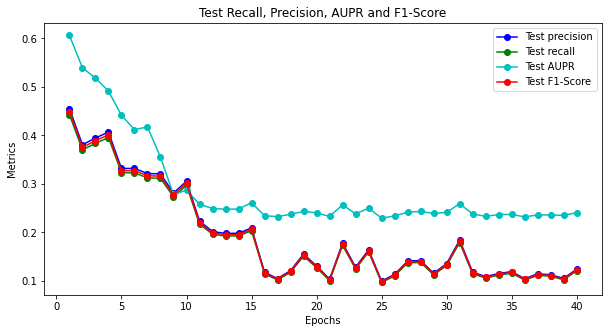

Epoch=0	Loss=3127516.1918
Epoch=10	Loss=983.1278
Epoch=20	Loss=587.6546
Epoch=30	Loss=561.5778
Epoch=40	Loss=554.9249
Epoch=50	Loss=552.4892
Epoch=60	Loss=550.8653
Epoch=70	Loss=549.9374
Epoch=80	Loss=550.2066
Epoch=90	Loss=547.6185
Epoch=100	Loss=546.8528
Epoch=110	Loss=546.6918
Epoch=120	Loss=545.8481
Epoch=130	Loss=546.4501
Epoch=140	Loss=545.2721
Epoch=150	Loss=544.6996
Epoch=160	Loss=544.9532
Epoch=170	Loss=544.5128
Epoch=180	Loss=545.5060
Epoch=190	Loss=544.9195
Best epoch=1	Precision=0.3291	Recall=0.3199	Best F1-Score=0.3244


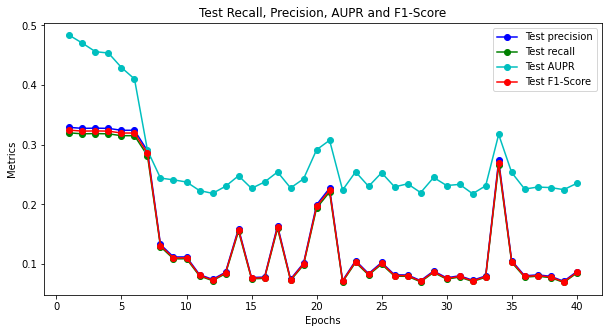

Epoch=0	Loss=1622252.3746
Epoch=10	Loss=888.2725
Epoch=20	Loss=566.3568
Epoch=30	Loss=541.1902
Epoch=40	Loss=535.9286
Epoch=50	Loss=534.0668
Epoch=60	Loss=533.0966
Epoch=70	Loss=532.0343
Epoch=80	Loss=531.4606
Epoch=90	Loss=530.8706
Epoch=100	Loss=530.5323
Epoch=110	Loss=530.0359
Epoch=120	Loss=529.5098
Epoch=130	Loss=528.9904
Epoch=140	Loss=528.2620
Epoch=150	Loss=527.2845
Epoch=160	Loss=527.1950
Epoch=170	Loss=526.6352
Epoch=180	Loss=530.4201
Epoch=190	Loss=525.8550
Best epoch=16	Precision=0.3739	Recall=0.3634	Best F1-Score=0.3686


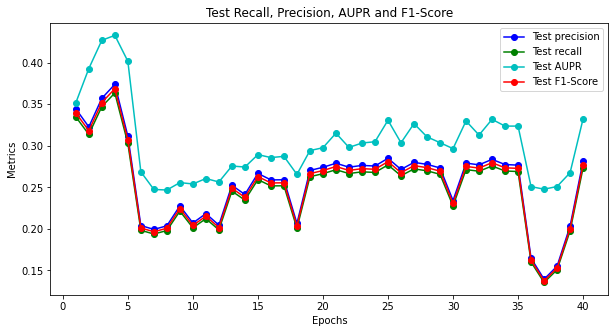

Epoch=0	Loss=1468259.8405
Epoch=10	Loss=707.6372
Epoch=20	Loss=594.8411
Epoch=30	Loss=576.2760
Epoch=40	Loss=567.0280
Epoch=50	Loss=561.9225
Epoch=60	Loss=557.7428
Epoch=70	Loss=555.2936
Epoch=80	Loss=553.4896
Epoch=90	Loss=552.6962
Epoch=100	Loss=551.5997
Epoch=110	Loss=550.8423
Epoch=120	Loss=550.4619
Epoch=130	Loss=550.7262
Epoch=140	Loss=549.6965
Epoch=150	Loss=549.4342
Epoch=160	Loss=549.5819
Epoch=170	Loss=549.1153
Epoch=180	Loss=549.2593
Epoch=190	Loss=548.4828
Best epoch=1	Precision=0.4669	Recall=0.4539	Best F1-Score=0.4603


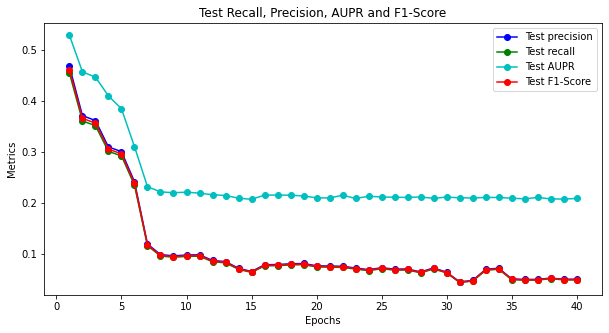

Epoch=0	Loss=5669771.8021
Epoch=10	Loss=1209.8446
Epoch=20	Loss=589.4800
Epoch=30	Loss=559.0807
Epoch=40	Loss=554.1987
Epoch=50	Loss=551.7358
Epoch=60	Loss=549.7024
Epoch=70	Loss=548.2798
Epoch=80	Loss=546.7078
Epoch=90	Loss=545.2314
Epoch=100	Loss=543.6684
Epoch=110	Loss=541.9265
Epoch=120	Loss=540.7787
Epoch=130	Loss=540.2392
Epoch=140	Loss=539.2502
Epoch=150	Loss=539.1376
Epoch=160	Loss=538.6345
Epoch=170	Loss=538.1458
Epoch=180	Loss=537.8193
Epoch=190	Loss=537.5244
Best epoch=11	Precision=0.6177	Recall=0.6004	Best F1-Score=0.6089


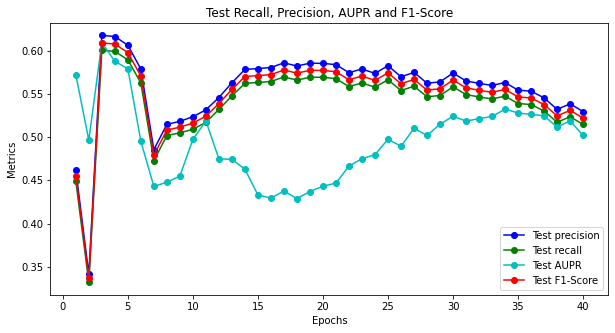

Epoch=0	Loss=1466023.0145
Epoch=10	Loss=638.5953
Epoch=20	Loss=552.1155
Epoch=30	Loss=537.0175
Epoch=40	Loss=530.0559
Epoch=50	Loss=526.6436
Epoch=60	Loss=525.2968
Epoch=70	Loss=524.1927
Epoch=80	Loss=523.3524
Epoch=90	Loss=522.7937
Epoch=100	Loss=522.5039
Epoch=110	Loss=522.0457
Epoch=120	Loss=521.0163
Epoch=130	Loss=520.8730
Epoch=140	Loss=520.8657
Epoch=150	Loss=520.1725
Epoch=160	Loss=519.9017
Epoch=170	Loss=519.9447
Epoch=180	Loss=519.7343
Epoch=190	Loss=519.7147
Best epoch=1	Precision=0.3663	Recall=0.3560	Best F1-Score=0.3611


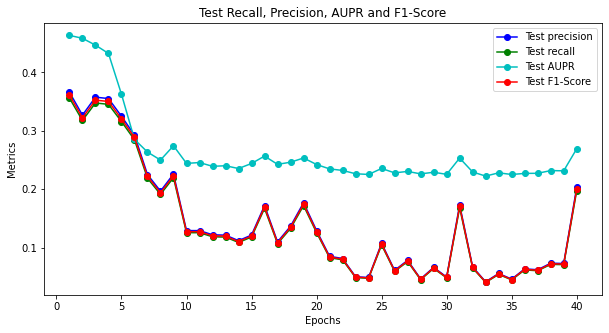

Epoch=0	Loss=7382203.7252
Epoch=10	Loss=1553.4418
Epoch=20	Loss=603.0513
Epoch=30	Loss=564.8185
Epoch=40	Loss=555.3424
Epoch=50	Loss=543.1970
Epoch=60	Loss=540.4899
Epoch=70	Loss=538.6336
Epoch=80	Loss=537.4823
Epoch=90	Loss=536.1389
Epoch=100	Loss=534.8461
Epoch=110	Loss=534.3460
Epoch=120	Loss=533.9563
Epoch=130	Loss=533.8961
Epoch=140	Loss=532.6797
Epoch=150	Loss=532.4191
Epoch=160	Loss=531.4941
Epoch=170	Loss=531.0761
Epoch=180	Loss=530.7866
Epoch=190	Loss=530.0020
Best epoch=16	Precision=0.6174	Recall=0.6002	Best F1-Score=0.6087


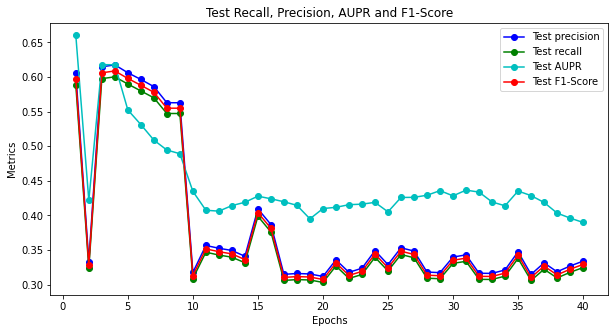

Epoch=0	Loss=696176.8624
Epoch=10	Loss=848.4059
Epoch=20	Loss=585.5497
Epoch=30	Loss=569.5453
Epoch=40	Loss=563.7182
Epoch=50	Loss=560.9009
Epoch=60	Loss=559.9927
Epoch=70	Loss=559.1447
Epoch=80	Loss=558.7643
Epoch=90	Loss=558.1943
Epoch=100	Loss=557.0396
Epoch=110	Loss=557.8601
Epoch=120	Loss=556.9147
Epoch=130	Loss=555.9361
Epoch=140	Loss=553.0259
Epoch=150	Loss=552.9652
Epoch=160	Loss=552.7972
Epoch=170	Loss=552.1852
Epoch=180	Loss=552.7870
Epoch=190	Loss=552.4570
Best epoch=6	Precision=0.6792	Recall=0.6603	Best F1-Score=0.6696


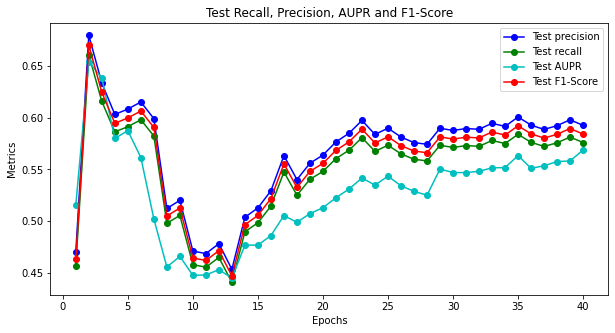

Epoch=0	Loss=365048.4654
Epoch=10	Loss=734.7304
Epoch=20	Loss=561.3628
Epoch=30	Loss=553.9272
Epoch=40	Loss=549.5278
Epoch=50	Loss=546.5945
Epoch=60	Loss=545.2433
Epoch=70	Loss=543.9706
Epoch=80	Loss=543.3563
Epoch=90	Loss=542.5527
Epoch=100	Loss=542.2417
Epoch=110	Loss=541.9744
Epoch=120	Loss=541.5630
Epoch=130	Loss=541.2134
Epoch=140	Loss=540.9823
Epoch=150	Loss=540.7583
Epoch=160	Loss=540.3719
Epoch=170	Loss=540.1526
Epoch=180	Loss=539.8247
Epoch=190	Loss=540.0051
Best epoch=1	Precision=0.4418	Recall=0.4295	Best F1-Score=0.4356


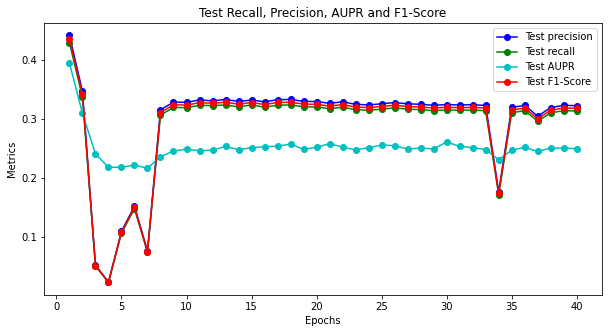

Epoch=0	Loss=3587458.4742
Epoch=10	Loss=895.3396
Epoch=20	Loss=566.9226
Epoch=30	Loss=545.0130
Epoch=40	Loss=540.5110
Epoch=50	Loss=535.4165
Epoch=60	Loss=532.5878
Epoch=70	Loss=531.2282
Epoch=80	Loss=528.7938
Epoch=90	Loss=526.7470
Epoch=100	Loss=525.0714
Epoch=110	Loss=523.9678
Epoch=120	Loss=523.4094
Epoch=130	Loss=523.4428
Epoch=140	Loss=522.7479
Epoch=150	Loss=522.3776
Epoch=160	Loss=522.6175
Epoch=170	Loss=522.0129
Epoch=180	Loss=521.7000
Epoch=190	Loss=521.9259
Best epoch=6	Precision=0.6111	Recall=0.5941	Best F1-Score=0.6025


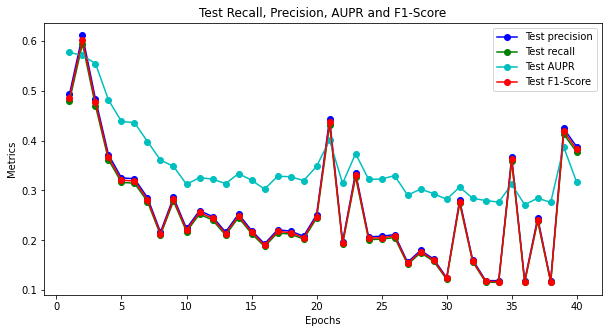

Training model memae for 20 runs of 200 epochs each
Epoch=0	Loss=19.8111
Epoch=10	Loss=2.6817
Epoch=20	Loss=2.5255
Epoch=30	Loss=2.2057
Epoch=40	Loss=1.9438
Epoch=50	Loss=1.8516
Epoch=60	Loss=1.8010
Epoch=70	Loss=1.7251
Epoch=80	Loss=1.6503
Epoch=90	Loss=1.5900
Epoch=100	Loss=1.5458
Epoch=110	Loss=1.5086
Epoch=120	Loss=1.4727
Epoch=130	Loss=1.4446
Epoch=140	Loss=1.4210
Epoch=150	Loss=1.4019
Epoch=160	Loss=1.3870
Epoch=170	Loss=1.3741
Epoch=180	Loss=1.3641
Epoch=190	Loss=1.3533
Best epoch=61	Precision=0.6247	Recall=0.6073	Best F1-Score=0.6159


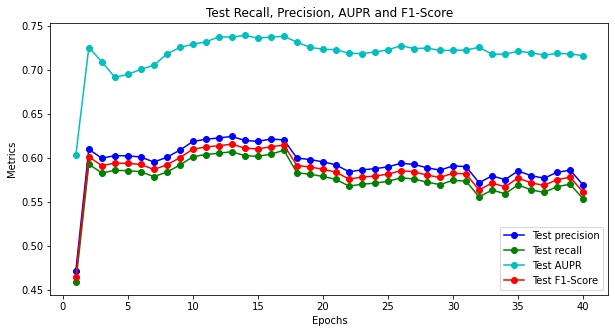

Epoch=0	Loss=20.2758
Epoch=10	Loss=2.8940
Epoch=20	Loss=2.4207
Epoch=30	Loss=2.3234
Epoch=40	Loss=2.2537
Epoch=50	Loss=2.1919
Epoch=60	Loss=2.1348
Epoch=70	Loss=2.0873
Epoch=80	Loss=2.0458
Epoch=90	Loss=2.0123
Epoch=100	Loss=1.9813
Epoch=110	Loss=1.9564
Epoch=120	Loss=1.9363
Epoch=130	Loss=1.9188
Epoch=140	Loss=1.9037
Epoch=150	Loss=1.8904
Epoch=160	Loss=1.8795
Epoch=170	Loss=1.8695
Epoch=180	Loss=1.8581
Epoch=190	Loss=1.8490
Best epoch=16	Precision=0.6091	Recall=0.5927	Best F1-Score=0.6008


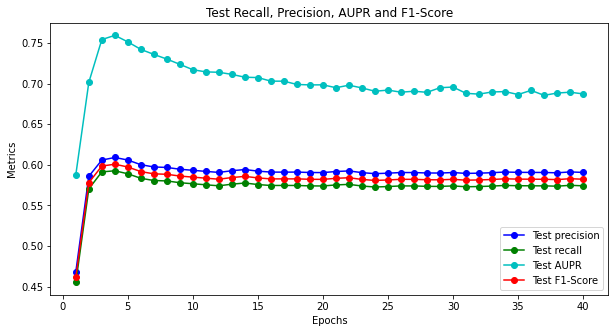

Epoch=0	Loss=21.9815
Epoch=10	Loss=5.0517
Epoch=20	Loss=2.5218
Epoch=30	Loss=2.0356
Epoch=40	Loss=1.8729
Epoch=50	Loss=1.7820
Epoch=60	Loss=1.7143
Epoch=70	Loss=1.6656
Epoch=80	Loss=1.6278
Epoch=90	Loss=1.5958
Epoch=100	Loss=1.5686
Epoch=110	Loss=1.5386
Epoch=120	Loss=1.5049
Epoch=130	Loss=1.4767
Epoch=140	Loss=1.4590
Epoch=150	Loss=1.4567
Epoch=160	Loss=1.4349
Epoch=170	Loss=1.4367
Epoch=180	Loss=1.4146
Epoch=190	Loss=1.4170
Best epoch=86	Precision=0.7099	Recall=0.6901	Best F1-Score=0.6999


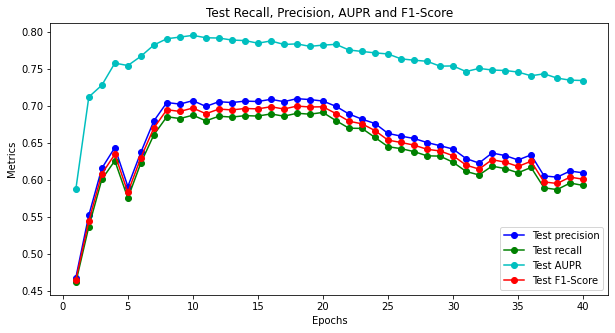

Epoch=0	Loss=22.2366
Epoch=10	Loss=2.5594
Epoch=20	Loss=2.2615
Epoch=30	Loss=2.1444
Epoch=40	Loss=2.0803
Epoch=50	Loss=2.0370
Epoch=60	Loss=1.9994
Epoch=70	Loss=1.9672
Epoch=80	Loss=1.9305
Epoch=90	Loss=1.8981
Epoch=100	Loss=1.8676
Epoch=110	Loss=1.8439
Epoch=120	Loss=2.1309
Epoch=130	Loss=2.0983
Epoch=140	Loss=2.0757
Epoch=150	Loss=2.0573
Epoch=160	Loss=2.0424
Epoch=170	Loss=2.0329
Epoch=180	Loss=2.0031
Epoch=190	Loss=1.9801
Best epoch=86	Precision=0.6866	Recall=0.6674	Best F1-Score=0.6769


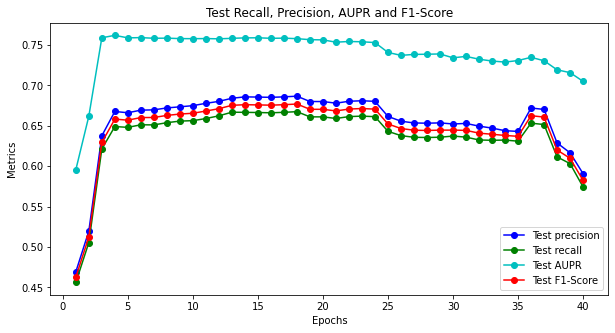

Epoch=0	Loss=21.9900
Epoch=10	Loss=3.4019
Epoch=20	Loss=2.3199
Epoch=30	Loss=2.1858
Epoch=40	Loss=2.1279
Epoch=50	Loss=2.0818
Epoch=60	Loss=2.0402
Epoch=70	Loss=1.9995
Epoch=80	Loss=1.9603
Epoch=90	Loss=1.9244
Epoch=100	Loss=1.8910
Epoch=110	Loss=1.8601
Epoch=120	Loss=1.8366
Epoch=130	Loss=1.8150
Epoch=140	Loss=1.7973
Epoch=150	Loss=1.7822
Epoch=160	Loss=1.7666
Epoch=170	Loss=1.7537
Epoch=180	Loss=1.7441
Epoch=190	Loss=1.7324
Best epoch=171	Precision=0.6920	Recall=0.6727	Best F1-Score=0.6822


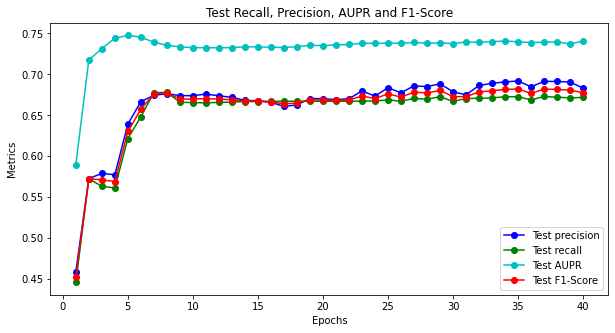

Epoch=0	Loss=19.4001
Epoch=10	Loss=2.8112
Epoch=20	Loss=2.4653
Epoch=30	Loss=2.3806
Epoch=40	Loss=2.2937
Epoch=50	Loss=2.2228
Epoch=60	Loss=2.1674
Epoch=70	Loss=2.1197
Epoch=80	Loss=2.0738
Epoch=90	Loss=2.0305
Epoch=100	Loss=1.9931
Epoch=110	Loss=1.9400
Epoch=120	Loss=1.9072
Epoch=130	Loss=1.8782
Epoch=140	Loss=1.8460
Epoch=150	Loss=1.8220
Epoch=160	Loss=1.8003
Epoch=170	Loss=1.7821
Epoch=180	Loss=1.7648
Epoch=190	Loss=1.7538
Best epoch=26	Precision=0.6795	Recall=0.6606	Best F1-Score=0.6699


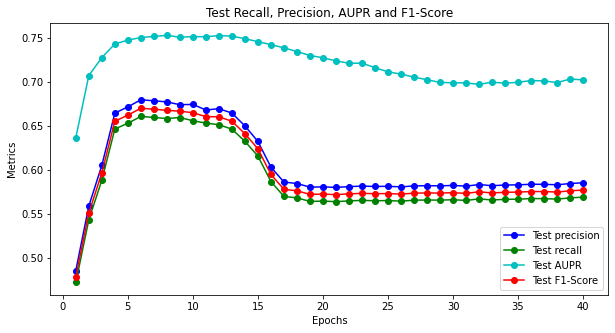

Epoch=0	Loss=19.8359
Epoch=10	Loss=3.5900
Epoch=20	Loss=2.4673
Epoch=30	Loss=2.1507
Epoch=40	Loss=1.9293
Epoch=50	Loss=1.8135
Epoch=60	Loss=1.7347
Epoch=70	Loss=1.6814
Epoch=80	Loss=1.6322
Epoch=90	Loss=1.5833
Epoch=100	Loss=1.5477
Epoch=110	Loss=1.5156
Epoch=120	Loss=1.4692
Epoch=130	Loss=1.4367
Epoch=140	Loss=1.4109
Epoch=150	Loss=1.3869
Epoch=160	Loss=1.3670
Epoch=170	Loss=1.3497
Epoch=180	Loss=1.3349
Epoch=190	Loss=1.3195
Best epoch=11	Precision=0.6477	Recall=0.6296	Best F1-Score=0.6385


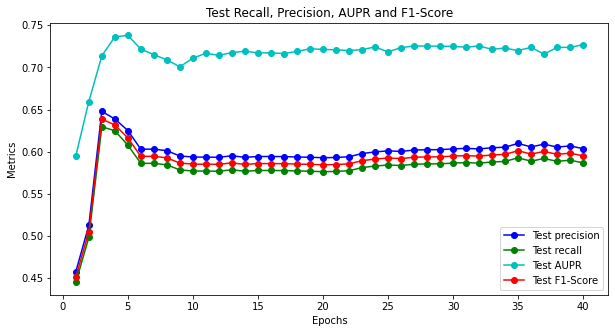

Epoch=0	Loss=21.2355
Epoch=10	Loss=2.6724
Epoch=20	Loss=2.4340
Epoch=30	Loss=2.3344
Epoch=40	Loss=2.2691
Epoch=50	Loss=2.2232
Epoch=60	Loss=2.1599
Epoch=70	Loss=1.9829
Epoch=80	Loss=1.9197
Epoch=90	Loss=1.8840
Epoch=100	Loss=1.8406
Epoch=110	Loss=1.7901
Epoch=120	Loss=1.7449
Epoch=130	Loss=1.7148
Epoch=140	Loss=1.6938
Epoch=150	Loss=1.6745
Epoch=160	Loss=1.6529
Epoch=170	Loss=1.6371
Epoch=180	Loss=1.6240
Epoch=190	Loss=1.6134
Best epoch=11	Precision=0.6278	Recall=0.6114	Best F1-Score=0.6195


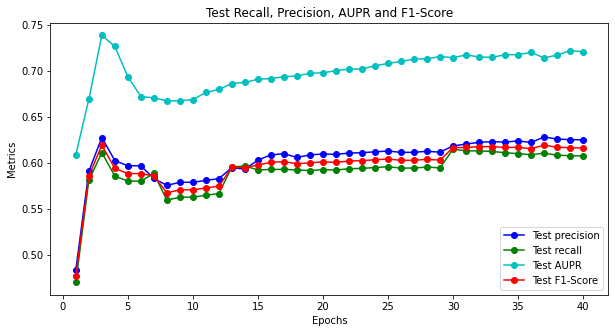

Epoch=0	Loss=21.1696
Epoch=10	Loss=3.1100
Epoch=20	Loss=2.4395
Epoch=30	Loss=2.2917
Epoch=40	Loss=2.2136
Epoch=50	Loss=2.1542
Epoch=60	Loss=2.0933
Epoch=70	Loss=2.0354
Epoch=80	Loss=1.9895
Epoch=90	Loss=1.9537
Epoch=100	Loss=1.9222
Epoch=110	Loss=1.8975
Epoch=120	Loss=1.8825
Epoch=130	Loss=1.8577
Epoch=140	Loss=1.8400
Epoch=150	Loss=1.8251
Epoch=160	Loss=1.8205
Epoch=170	Loss=1.8008
Epoch=180	Loss=1.7870
Epoch=190	Loss=1.7759
Best epoch=6	Precision=0.6404	Recall=0.6225	Best F1-Score=0.6313


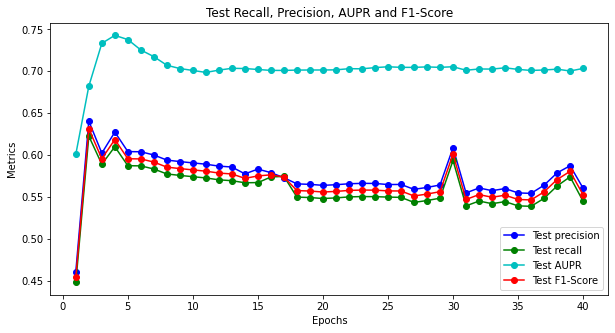

Epoch=0	Loss=22.3414
Epoch=10	Loss=2.9263
Epoch=20	Loss=2.4622
Epoch=30	Loss=2.3380
Epoch=40	Loss=2.2390
Epoch=50	Loss=2.1622
Epoch=60	Loss=2.1013
Epoch=70	Loss=1.9994
Epoch=80	Loss=1.9163
Epoch=90	Loss=1.8603
Epoch=100	Loss=1.8024
Epoch=110	Loss=1.7415
Epoch=120	Loss=1.6980
Epoch=130	Loss=1.6613
Epoch=140	Loss=1.6308
Epoch=150	Loss=1.6051
Epoch=160	Loss=1.5832
Epoch=170	Loss=1.5619
Epoch=180	Loss=1.5471
Epoch=190	Loss=1.5263
Best epoch=66	Precision=0.6071	Recall=0.5901	Best F1-Score=0.5985


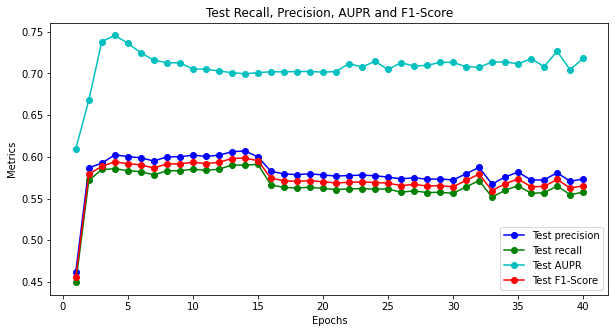

Epoch=0	Loss=19.8582
Epoch=10	Loss=3.1987
Epoch=20	Loss=2.4565
Epoch=30	Loss=2.3932
Epoch=40	Loss=2.3493
Epoch=50	Loss=2.3069
Epoch=60	Loss=2.2664
Epoch=70	Loss=2.2277
Epoch=80	Loss=2.1923
Epoch=90	Loss=2.1575
Epoch=100	Loss=2.1201
Epoch=110	Loss=2.0735
Epoch=120	Loss=2.0358
Epoch=130	Loss=2.0040
Epoch=140	Loss=1.9759
Epoch=150	Loss=1.9512
Epoch=160	Loss=1.9287
Epoch=170	Loss=1.9090
Epoch=180	Loss=1.8871
Epoch=190	Loss=1.8610
Best epoch=86	Precision=0.6054	Recall=0.5885	Best F1-Score=0.5968


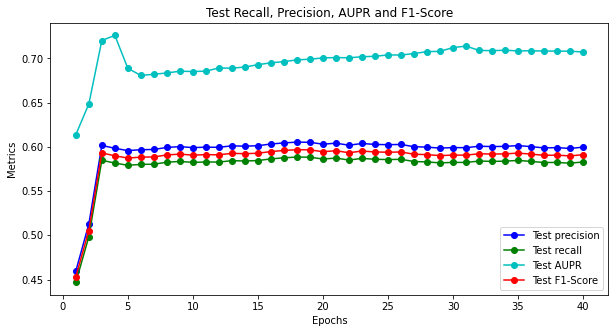

Epoch=0	Loss=21.5347
Epoch=10	Loss=3.2169
Epoch=20	Loss=2.7432
Epoch=30	Loss=2.3451
Epoch=40	Loss=2.1600
Epoch=50	Loss=2.0941
Epoch=60	Loss=2.0529
Epoch=70	Loss=2.0101
Epoch=80	Loss=1.9635
Epoch=90	Loss=1.9229
Epoch=100	Loss=1.8944
Epoch=110	Loss=1.8730
Epoch=120	Loss=1.8572
Epoch=130	Loss=1.8435
Epoch=140	Loss=1.8297
Epoch=150	Loss=1.8172
Epoch=160	Loss=1.8036
Epoch=170	Loss=1.7895
Epoch=180	Loss=1.7768
Epoch=190	Loss=1.7646
Best epoch=31	Precision=0.6568	Recall=0.6386	Best F1-Score=0.6476


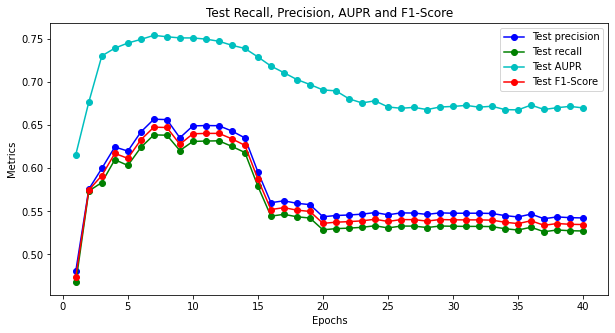

Epoch=0	Loss=20.8800
Epoch=10	Loss=2.9292
Epoch=20	Loss=2.6745
Epoch=30	Loss=2.4988
Epoch=40	Loss=2.3934
Epoch=50	Loss=2.2430
Epoch=60	Loss=2.1234
Epoch=70	Loss=2.0841
Epoch=80	Loss=2.0458
Epoch=90	Loss=1.9909
Epoch=100	Loss=1.9220
Epoch=110	Loss=1.8521
Epoch=120	Loss=1.7732
Epoch=130	Loss=1.7278
Epoch=140	Loss=1.7025
Epoch=150	Loss=1.6845
Epoch=160	Loss=1.6673
Epoch=170	Loss=1.6532
Epoch=180	Loss=1.6341
Epoch=190	Loss=1.6160
Best epoch=36	Precision=0.6854	Recall=0.6663	Best F1-Score=0.6757


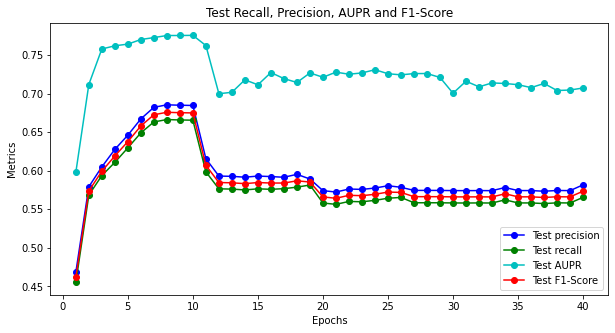

Epoch=0	Loss=21.0890
Epoch=10	Loss=2.9015
Epoch=20	Loss=2.3990
Epoch=30	Loss=2.2866
Epoch=40	Loss=2.0900
Epoch=50	Loss=1.9044
Epoch=60	Loss=1.7942
Epoch=70	Loss=1.7214
Epoch=80	Loss=1.6688
Epoch=90	Loss=1.6231
Epoch=100	Loss=1.5838
Epoch=110	Loss=1.5400
Epoch=120	Loss=1.5088
Epoch=130	Loss=1.4792
Epoch=140	Loss=1.4438
Epoch=150	Loss=1.4264
Epoch=160	Loss=1.4168
Epoch=170	Loss=1.3850
Epoch=180	Loss=1.3806
Epoch=190	Loss=1.3566
Best epoch=6	Precision=0.6299	Recall=0.6183	Best F1-Score=0.6241


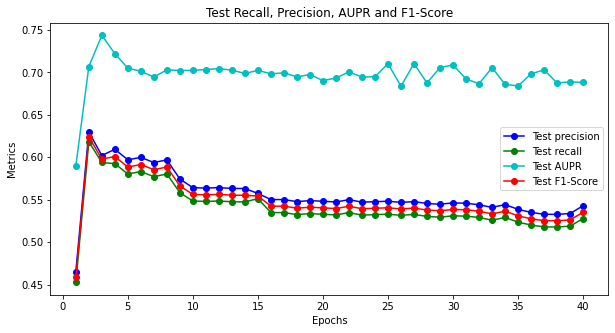

Epoch=0	Loss=21.6353
Epoch=10	Loss=3.7579
Epoch=20	Loss=2.5442
Epoch=30	Loss=2.3934
Epoch=40	Loss=2.2973
Epoch=50	Loss=2.2016
Epoch=60	Loss=2.0531
Epoch=70	Loss=1.8868
Epoch=80	Loss=1.7867
Epoch=90	Loss=1.7321
Epoch=100	Loss=1.6854
Epoch=110	Loss=1.6597
Epoch=120	Loss=1.6422
Epoch=130	Loss=1.5965
Epoch=140	Loss=1.5690
Epoch=150	Loss=1.5393
Epoch=160	Loss=1.5126
Epoch=170	Loss=1.4797
Epoch=180	Loss=1.4281
Epoch=190	Loss=1.3901
Best epoch=181	Precision=0.7155	Recall=0.6974	Best F1-Score=0.7063


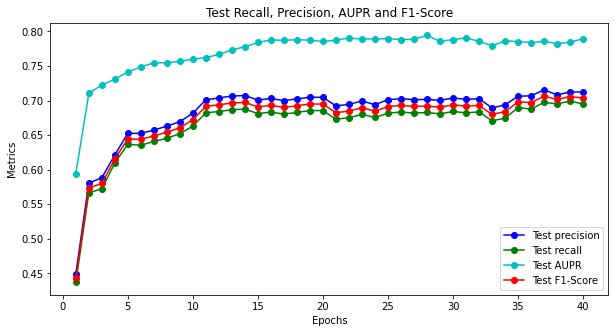

Epoch=0	Loss=20.3764
Epoch=10	Loss=3.3114
Epoch=20	Loss=2.5438
Epoch=30	Loss=2.4620
Epoch=40	Loss=2.3773
Epoch=50	Loss=2.2987
Epoch=60	Loss=2.2310
Epoch=70	Loss=2.1619
Epoch=80	Loss=2.1030
Epoch=90	Loss=2.0642
Epoch=100	Loss=2.0365
Epoch=110	Loss=2.0129
Epoch=120	Loss=1.9928
Epoch=130	Loss=1.9749
Epoch=140	Loss=1.9597
Epoch=150	Loss=1.9459
Epoch=160	Loss=1.9339
Epoch=170	Loss=1.9205
Epoch=180	Loss=1.9105
Epoch=190	Loss=1.9011
Best epoch=21	Precision=0.6180	Recall=0.6025	Best F1-Score=0.6101


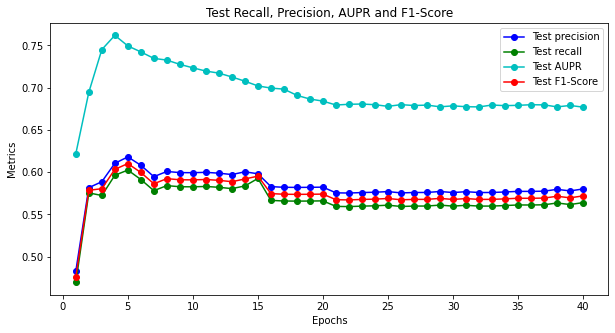

Epoch=0	Loss=18.3178
Epoch=10	Loss=3.0759
Epoch=20	Loss=2.4812
Epoch=30	Loss=2.3741
Epoch=40	Loss=2.2900
Epoch=50	Loss=2.1843
Epoch=60	Loss=2.0889
Epoch=70	Loss=2.0455
Epoch=80	Loss=2.0133
Epoch=90	Loss=1.9852
Epoch=100	Loss=1.9626
Epoch=110	Loss=1.9432
Epoch=120	Loss=1.9247
Epoch=130	Loss=1.9051
Epoch=140	Loss=1.8882
Epoch=150	Loss=1.8740
Epoch=160	Loss=1.8617
Epoch=170	Loss=1.8514
Epoch=180	Loss=1.8405
Epoch=190	Loss=1.8338
Best epoch=51	Precision=0.6191	Recall=0.6018	Best F1-Score=0.6103


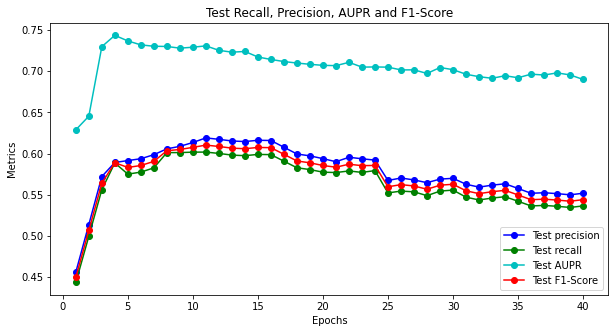

Epoch=0	Loss=21.6260
Epoch=10	Loss=2.9150
Epoch=20	Loss=2.3129
Epoch=30	Loss=2.2629
Epoch=40	Loss=2.2110
Epoch=50	Loss=2.1354
Epoch=60	Loss=2.0521
Epoch=70	Loss=1.9810
Epoch=80	Loss=1.9272
Epoch=90	Loss=1.8858
Epoch=100	Loss=1.8464
Epoch=110	Loss=1.8157
Epoch=120	Loss=1.7924
Epoch=130	Loss=1.7752
Epoch=140	Loss=1.7596
Epoch=150	Loss=1.7453
Epoch=160	Loss=1.7284
Epoch=170	Loss=1.7158
Epoch=180	Loss=1.7055
Epoch=190	Loss=1.6915
Best epoch=181	Precision=0.6470	Recall=0.6290	Best F1-Score=0.6379


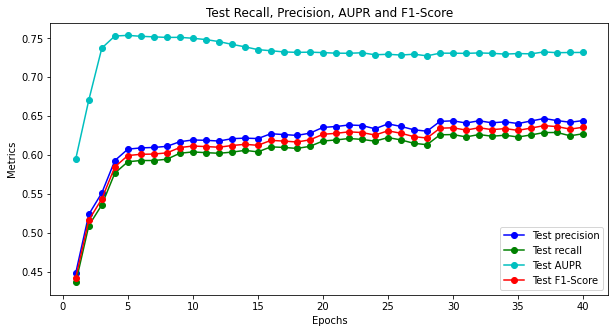

Epoch=0	Loss=20.0050
Epoch=10	Loss=2.9836
Epoch=20	Loss=2.6263
Epoch=30	Loss=2.2769
Epoch=40	Loss=2.2188
Epoch=50	Loss=2.1778
Epoch=60	Loss=2.1204
Epoch=70	Loss=2.0723
Epoch=80	Loss=2.0378
Epoch=90	Loss=2.0067
Epoch=100	Loss=1.9799
Epoch=110	Loss=1.9554
Epoch=120	Loss=1.9331
Epoch=130	Loss=1.9122
Epoch=140	Loss=1.8946
Epoch=150	Loss=1.8785
Epoch=160	Loss=1.8630
Epoch=170	Loss=1.8490
Epoch=180	Loss=1.8353
Epoch=190	Loss=1.8237
Best epoch=11	Precision=0.6251	Recall=0.6078	Best F1-Score=0.6163


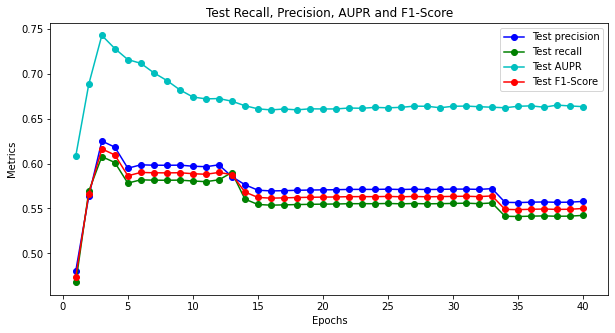

Epoch=0	Loss=22.1839
Epoch=10	Loss=3.4032
Epoch=20	Loss=2.5858
Epoch=30	Loss=2.5045
Epoch=40	Loss=2.4419
Epoch=50	Loss=2.3891
Epoch=60	Loss=2.3397
Epoch=70	Loss=2.3043
Epoch=80	Loss=2.2791
Epoch=90	Loss=2.2610
Epoch=100	Loss=2.2460
Epoch=110	Loss=2.2316
Epoch=120	Loss=2.2181
Epoch=130	Loss=2.2044
Epoch=140	Loss=2.1908
Epoch=150	Loss=2.1765
Epoch=160	Loss=2.1607
Epoch=170	Loss=2.1428
Epoch=180	Loss=2.1246
Epoch=190	Loss=2.1064
Best epoch=6	Precision=0.6460	Recall=0.6280	Best F1-Score=0.6369


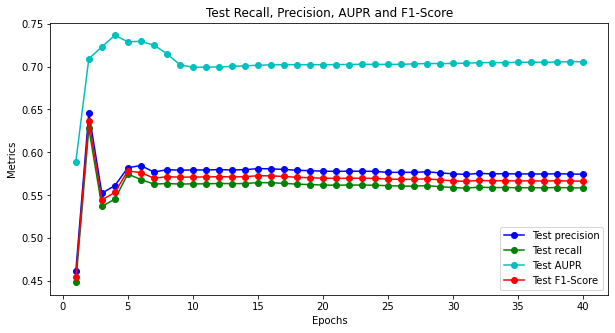

In [4]:
for model_name, params in models_params.items():
    f1_hist = []
    print("Training model {} for {} runs of {} epochs each".format(model_name, n_runs, n_epochs))
    model_cls, trainer_cls = params.pop("model_cls"), params.pop("trainer_cls")
    model_params = dict(
        **params, in_features=dataset.in_features, n_instances=dataset.n_instances, device=device
    )
    for run_i in range(n_runs):
        # Create directories
        ckpt_root = Path(model_name + "/train/run_{}".format(run_i + 1))
        ckpt_root.mkdir(parents=True, exist_ok=True)
        ckpt_best_root = Path(model_name + "/best")
        ckpt_best_root.mkdir(parents=True, exist_ok=True)
        # Set data loaders
        train_ldr, test_ldr = dataset.loaders(test_pct=0.5, batch_size=batch_size)
        # Set model and trainer
        model = model_cls(**model_params)
        trainer = trainer_cls(
            model=model,
            batch_size=batch_size,
            validation_ldr=test_ldr,
            device=device,
            lr=lr,
            n_epochs=n_epochs,
            run_test_validation=True,
            ckpt_root=str(ckpt_root.absolute()),
            keep_ckpt=True,
        )
        # Train
        trainer.train(train_ldr)
        # Print best F1-Score
        idx = np.argmax(trainer.metric_values["f1-score"])
        precision = trainer.metric_values["precision"][idx]
        recall = trainer.metric_values["recall"][idx]
        f1 = trainer.metric_values["f1-score"][idx]
        best_epoch = idx * 5 + 1
        print("Best epoch={}\tPrecision={:2.4f}\tRecall={:2.4f}\tBest F1-Score={:2.4f}".format(best_epoch, precision, recall, f1))
        # Print figure
        figname = str(ckpt_root.absolute()) + "/ids2017_thresh-auto.png"
        trainer.plot_metrics(figname=figname)
        # Load best model based on f1-score
        best_ckpt = str(ckpt_root.absolute()) + "/{}_epoch={}.pt".format(model_name, best_epoch)
        trainer, model = trainer_cls.load_from_file(best_ckpt, trainer, model, device)
        trainer.n_epochs = best_epoch
        best_epoch = 7 * 5 + 1
        # Evaluate best model on binary targets
        y_test_true, test_scores, test_labels = trainer.test(test_ldr)
        results = metrics.estimate_optimal_threshold(test_scores, y_test_true)
        y_pred = (test_scores >= results["Thresh_star"]).astype(int)
        store_results(
            results=results,
            params=dict(batch_size=batch_size, lr=lr, n_epochs=best_epoch, **model.get_params()),
            model_name=model_name,
            dataset="IDS2017",
            dataset_path=dataset_path,
            results_path="./"
        )
        # Save best model
        trainer.save_ckpt(str(ckpt_best_root.absolute()) + "/best_run_{}_{}.pt".format(run_i + 1, model_name))
        # Evaluate best model on every attack targets
        misclf_df = ids_misclf_per_label(y_pred, y_test_true, test_labels)
        misclf_df = misclf_df.sort_values("Misclassified ratio", ascending=False)
        misclf_df.to_csv(str(ckpt_root.absolute()) + "/{}_misclassifications.csv".format(model_name))
        for attack_label in dataset.labels:
            performance_hist[model_name][attack_label].append(misclf_df.loc[attack_label, "Misclassified ratio"])

In [5]:
np.save("./ids2017_performance_hist.npy", performance_hist)